In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HALS as hals
import pandas as pd

In [2]:
et_fqs = {'O1': 0.929536,  'P1': 0.997262, 'K1': 1.002738, 'N2': 1.895982, 'M2': 1.932274, 'S2': 2.0}
plt.style.use('default')

In [3]:
def signal_resolution(a_c):
    signals = []
    t = np.linspace(0, 100, 2400)
    frequencies = list(et_fqs.values())

    for a in a_c:
        harmonic1 = np.sin(2*np.pi*frequencies[0]*t)*a + np.cos(2*np.pi*frequencies[0]*t)*a
        harmonic2 = np.sin(2*np.pi*frequencies[1]*t)*a + np.cos(2*np.pi*frequencies[0]*t)*a
        harmonic3 = np.sin(2*np.pi*frequencies[2]*t)*a + np.cos(2*np.pi*frequencies[0]*t)*a
        harmonic4 = np.sin(2*np.pi*frequencies[3]*t)*a + np.cos(2*np.pi*frequencies[0]*t)*a
        harmonic5 = np.sin(2*np.pi*frequencies[4]*t)*a + np.cos(2*np.pi*frequencies[0]*t)*a
        signal = harmonic1 + harmonic2 + harmonic3 + harmonic4 + harmonic5
        signals.append(signal)

    return signals

In [4]:
a_c=np.logspace(-7,3,100)
signals=signal_resolution(a_c)

In [5]:
import matplotlib as mpl
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Times New Roman']})
#rc('font',**{'family':'sans-serif','sans-serif':['Times']})

rc('text', usetex=False)

mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
#mpl.rcParams['ytick.minor.visible'] = True
#mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['xtick.major.size'] = 2

Text(0, 0.5, 'Amplitude(m)')

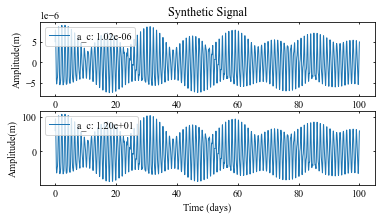

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3))
t = np.linspace(0, 100, 2400)
ax1.plot(t, signals[10])
ax1.set_title('Synthetic Signal')
#ax1.set_xlabel('Time (hours)')
ax1.legend([f"a_c: {a_c[10]:.2e}"])
ax1.set_ylabel('Amplitude(m)')

ax2.plot(t, signals[80])
#ax2.set_title('Synthetic Signal')
ax2.set_xlabel('Time (days)')
ax2.legend([f"a_c: {a_c[80]:.2e}"])
ax2.set_ylabel('Amplitude(m)')

In [7]:
length = 3.0 # length of the detrend window
stopper = 3 # minimum number of samples in window
n_ovrlp = 5 # number of window overlaps
A1=[]
P1=[]
for i in range(len(a_c)):
    signal_1=np.round(signals[i],2)
    df_detr = hals.lin_window_ovrlp(t, signal_1,length=length,stopper=stopper,n_ovrlp=n_ovrlp)
    #output = hals.hals_lsq(t, df_detr, list(freqs.values()))
    output = hals.hals_lsq(t, df_detr,[1.932274])

    A1.append(output[0]) 
    P1.append(output[1])

Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning num

In [9]:
A2=[]
P2=[]
for i in range(len(a_c)):
    signal_2=np.round(signals[i],3)
    df_detr = hals.lin_window_ovrlp(t, signal_2,length=length,stopper=stopper,n_ovrlp=n_ovrlp)
    #output = hals.hals_lsq(t, df_detr, list(freqs.values()))
    output = hals.hals_lsq(t, df_detr,[1.932274])

    A2.append(output[0]) 
    P2.append(output[1])

Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning num

In [10]:
A3=[]
P3=[]
for i in range(len(a_c)):
    signal_3=np.round(signals[i],4)
    df_detr = hals.lin_window_ovrlp(t, signal_3,length=length,stopper=stopper,n_ovrlp=n_ovrlp)
    #output = hals.hals_lsq(t, df_detr, list(freqs.values()))
    output = hals.hals_lsq(t, df_detr,[1.932274])

    A3.append(output[0]) 
    P3.append(output[1])

Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning number:  1.4147845161657369
Conditioning num

Text(0, 0.5, 'Amplitude(m),preserve four')

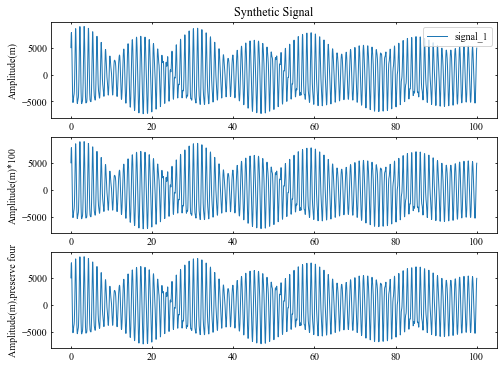

In [11]:
fig1=plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(311)
ax1.plot(t, signal_1)
ax1.set_title('Synthetic Signal')
#ax1.set_xlabel('Time (hours)')
ax1.legend(["signal_1"])
ax1.set_ylabel('Amplitude(m)')
ax1 = fig1.add_subplot(312)
ax1.plot(t, signal_2)
ax1.set_ylabel('Amplitude(m)*100')
ax1 = fig1.add_subplot(313)
ax1.plot(t, signal_3)
ax1.set_ylabel('Amplitude(m),preserve four')

In [12]:
def syn_amp(a):
    amp=np.sqrt(a**2+a**2)
    return amp
Syn_A=syn_amp(a_c)

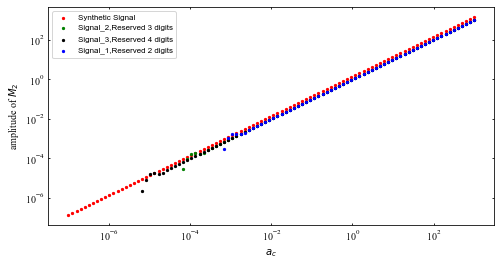

In [20]:
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 8,
}
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

# ax.plot(a_c,np.abs(np.asarray(A1)),'b-',label='Signal_1')
# ax.plot(a_c,np.abs(np.asarray(A2)),'g-',label='Signal_2')
# ax.plot(a_c,np.abs(np.asarray(A3)),'k-',label='Signal_3')
# ax.plot(a_c,np.abs(Syn_A),'r',label='Synthetic Signal')
ax.scatter(a_c,np.abs(Syn_A),s=5,c='r',label='Synthetic Signal')

ax.scatter(a_c,np.abs(np.asarray(A2)),s=5,c='g',label='Signal_2,Reserved 3 digits')
ax.scatter(a_c,np.abs(np.asarray(A3)),s=5,c='k',label='Signal_3,Reserved 4 digits')
ax.scatter(a_c,np.abs(np.asarray(A1)),s=5,c='b',label='Signal_1,Reserved 2 digits')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel('$a_{c}$')
ax.set_ylabel('amplitude of $M_{2}$')
ax.legend(loc=2,prop=font1)
fig.savefig('resolution limit.png',bbox_inches='tight')

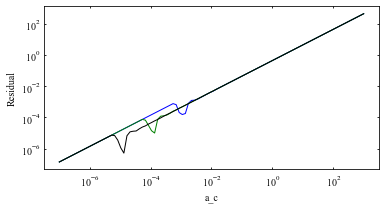

In [14]:
residual_1=abs(np.reshape(A1, (-1,))-Syn_A)
residual_2=abs(np.reshape(A2, (-1,))-Syn_A)
residual_3=abs(np.reshape(A3, (-1,))-Syn_A)
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.plot(a_c,abs(residual_1),'b-')
ax.plot(a_c,abs(residual_2),'g-')
ax.plot(a_c,abs(residual_3),'k-')
ax.set_xlabel('a_c')
ax.set_ylabel('Residual')
#ax.set_ylim([1e-6,1e-5])
ax.set_yscale("log")
ax.set_xscale("log")